In [6]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
block_size = 3
X, Y = [], []
for w in words[:10]:
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


[13, 1, 0]
[9, 1, 0]
[22, 1, 0]
[12, 1, 0]
[9, 1, 0]
[20, 5, 0]
[9, 1, 0]
[9, 1, 0]
[5, 18, 0]
[25, 14, 0]


NameError: name 'torch' is not defined

In [14]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [12]:
#actually building the dataset
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0]*block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print (X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [13]:
C = torch.randn((27,2))

In [15]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [16]:
emb.view(-1,6).shape
#C.shape = 27x2
#X.shape = 228146x3
#emb.shape = 228146x3x2

torch.Size([228146, 6])

In [17]:
emb.view(-1,6) 

tensor([[-1.1069, -0.4628, -1.1069, -0.4628, -1.1069, -0.4628],
        [-1.1069, -0.4628, -1.1069, -0.4628,  0.1661,  1.6137],
        [-1.1069, -0.4628,  0.1661,  1.6137, -1.7054, -1.1066],
        ...,
        [ 2.3639, -0.6737,  2.3639, -0.6737,  0.1817, -0.1423],
        [ 2.3639, -0.6737,  0.1817, -0.1423,  2.3639, -0.6737],
        [ 0.1817, -0.1423,  2.3639, -0.6737, -1.3008, -1.5759]])

In [63]:
X.shape

torch.Size([228146, 3])

In [64]:
W1 = torch.randn((2*block_size, 100))
b1 = torch.randn(100)

h = torch.tanh(emb.view(-1,6) @ W1 + b1)

h.shape


torch.Size([228146, 100])

In [19]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [20]:
logits = h @ W2 + b2

In [28]:
logits.shape

torch.Size([228146, 27])

In [29]:
counts = logits.exp()

In [23]:
prob = counts/counts.sum(1, keepdim=True)
prob

tensor([[6.8924e-09, 6.1650e-08, 1.4662e-05,  ..., 4.6793e-12, 1.9986e-11,
         1.0787e-09],
        [2.8950e-06, 1.0432e-06, 3.1585e-07,  ..., 3.3632e-11, 2.1647e-09,
         1.7485e-13],
        [1.3630e-04, 6.8673e-09, 1.6557e-07,  ..., 5.7422e-15, 2.7902e-10,
         1.3173e-08],
        ...,
        [1.8566e-09, 1.2503e-07, 1.5669e-11,  ..., 1.2147e-01, 5.1083e-08,
         1.9689e-04],
        [8.4506e-15, 6.2414e-06, 4.7206e-07,  ..., 1.8006e-02, 2.5509e-07,
         5.2297e-06],
        [1.7099e-10, 2.0265e-14, 5.1809e-11,  ..., 2.5888e-05, 1.1029e-12,
         3.0834e-08]])

In [44]:
prob.shape

torch.Size([228146, 27])

In [31]:
torch.arange(200000)

tensor([     0,      1,      2,  ..., 199997, 199998, 199999])

In [65]:
Y.shape

torch.Size([228146])

In [61]:
prob[torch.arange(228146),Y].log().mean()

tensor(-16.5184)

In [24]:
loss = -prob[torch.arange(228146), Y].log().mean()

In [32]:
loss.shape

torch.Size([])

In [26]:
#----------- now doing respectfully/properly-----------#

In [49]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [50]:
g = torch.Generator().manual_seed(42)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [71]:
C.shape

torch.Size([27, 10])

In [72]:
ix = torch.randint(0, len(Xtr), (32,))

In [75]:
ix

tensor([  2824,  51281,  12727,  96984, 176214,  89292, 160659,  63297, 128841,
        177421, 179015, 171173, 146996, 103674,  37506, 171670, 156833,  88279,
         27122,  95499, 140831, 165440, 114394,  53562,  60284, 108909, 129185,
        104863,  89262,  20350, 128771, 110852])

In [76]:
Xtr.shape

torch.Size([182625, 3])

In [ ]:
Xtr[ix].shape
# c- 27x10

tensor([ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
        -0.7521,  1.6487], grad_fn=<SelectBackward0>)

In [ ]:
C


In [51]:
sum(p.nelement() for p in parameters)

11897

In [53]:
for p in parameters:
    p.requires_grad = True

In [54]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [55]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):
    #minibatch construct
    ix = torch.randint(0, len(Xtr), (32,))

    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    print (loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i <100000 else 0.01
    for p in parameters:
        p.data -= lr*p.grad
    
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())


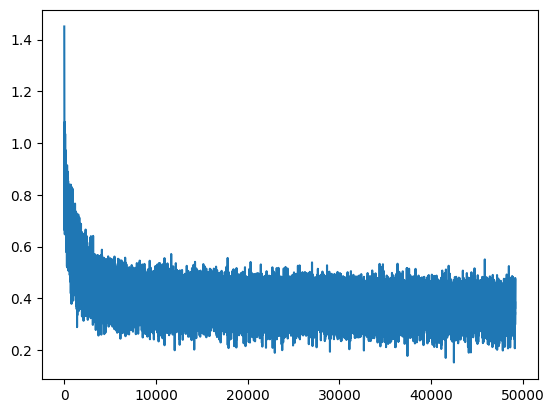

In [113]:
plt.plot(stepi, lossi)


In [66]:
C.shape

torch.Size([27, 2])

In [114]:
C[Xtr].shape


torch.Size([182625, 3, 10])

In [128]:
#minibatch construct
#ix = torch.randint(0, len(Xdev), (32,))

#forward pass
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2

loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3256, grad_fn=<NllLossBackward0>)

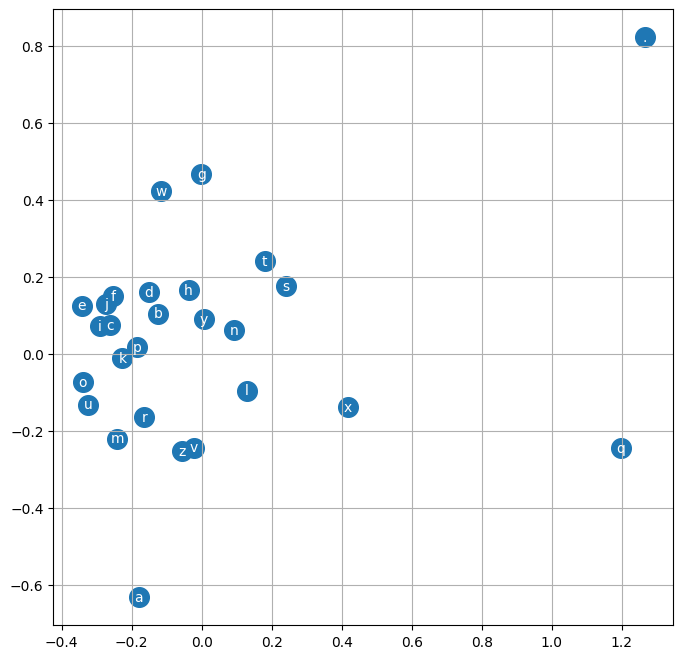

In [132]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [134]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [135]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

In [138]:
for i in range(100):
    out = []
    context = [0]*block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        prob = F.softmax(logits, 1) #convert to probabilities
        ix = torch.multinomial(prob, 1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join([itos[i] for i in out]))

syn.
eas.
riy.
nazhat.
xeardo.
yumiri.
jayleen.
marconte.
yukosus.
karmel.
pheayamrtishan.
cabett.
que.
telesse.
jirianna.
rye.
kyllin.
lad.
kalin.
bewksti.
awsi.
ammi.
angea.
shari.
kayleya.
tatixia.
addi.
eld.
desareigh.
zar.
arili.
armalyn.
fareladalean.
yantrix.
bummia.
mades.
lays.
ele.
ajy.
kadon.
ayzi.
daik.
aiya.
anguelen.
anna.
adkiell.
que.
fik.
sarenu.
aquav.
atelesean.
amion.
alyand.
kyen.
amira.
lumi.
kembaror.
amion.
haysobrycshari.
parin.
yael.
jacie.
lyk.
kohbon.
afin.
yeik.
jaciappore.
yanna.
yawn.
zar.
aeyanni.
adiliobrie.
eannilo.
yamarie.
jes.
vin.
iris.
bree.
modrieilion.
carali.
abeonno.
cake.
amir.
afler.
fariu.
sorion.
azmani.
alee.
cokdrandbeani.
amiraiya.
que.
vara.
tarioustevel.
ayrohie.
ker.
aun.
zatie.
ety.
loy.
and.
